# Data Science research Methods Report-2

## **Introduction**<br>
The PAMAP2 Physical Activity Monitoring dataset (available here) contains data from 9 participants who participated in 18 various physical activities (such as walking, cycling, and soccer) while wearing three inertial measurement units (IMUs) and a heart rate monitor. This information is saved in separate text files for each subject. The goal is to build hardware and/or software that can determine the amount and type of physical activity performed by an individual by using insights derived from analysing the given dataset. 

%%HTML<br>
<style type="text/css"><br>
table.dataframe td, table.dataframe th {<br>
    border: 1px  black solid !important;<br>
  color: black !important;<br>
}<br>
</style>

In [81]:
import os
from IPython.display import display
from matplotlib import rcParams
import numpy as np
import seaborn as sns
os.chdir("/home/sahil/Downloads/PAMAP2_Dataset/Protocol")
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning<br>
For tidying up the data :<br>
- We load the data of various subjects and give relevant column names<br>
  for various features. <br>
- The data for all subjects are then stacked together to form one table.<br>
- We remove the 'Orientation' columns because it was mentioned <br>
  in the data report that it is invalid in this data collection.<br>
- Similarly, the rows with Activity ID "0" are also removed as<br>
  it does not relate to any specific activity.<br>
- The missing values are filled up using the mean for that feature.


<br>
Given below are functions to give relevant names to the columns and create a<br>
single table containing data for all subjects<br>


In [82]:
def gen_activity_names():
    # Using this function all the activity names are mapped to their ids
    act_name = {}
    act_name[0] = 'transient'
    act_name[1] = 'lying'
    act_name[2] = 'sitting'
    act_name[3] = 'standing'
    act_name[4] = 'walking'
    act_name[5] = 'running'
    act_name[6] = 'cycling'
    act_name[7] = 'Nordic_walking'
    act_name[9] = 'watching_TV'
    act_name[10] = 'computer_work'
    act_name[11] = 'car driving'
    act_name[12] = 'ascending_stairs'
    act_name[13] = 'descending_stairs'
    act_name[16] = 'vacuum_cleaning'
    act_name[17] = 'ironing'
    act_name[18] = 'folding_laundry'
    act_name[19] = 'house_cleaning'
    act_name[20] = 'playing_soccer'
    act_name[24] = 'rope_jumping'
    return act_name
def generate_three_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]
def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]
def generate_cols_IMU(name):
    # temp
    temp = name+'_temperature'
    output = [temp]
    # acceleration 16
    acceleration16 = name+'_3D_acceleration_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)
    # acceleration 6
    acceleration6 = name+'_3D_acceleration_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)
    # gyroscope
    gyroscope = name+'_3D_gyroscope'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)
    # magnometer
    magnometer = name+'_3D_magnetometer'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
    # oreintation
    oreintation = name+'_4D_orientation'
    oreintation = generate_four_IMU(oreintation)
    output.extend(oreintation)
    return output
def load_IMU():
    output = ['time_stamp','activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output
def load_subjects(root='/home/sahil/Downloads/PAMAP2_Dataset/Protocol/subject'):
    output = pd.DataFrame()
    cols = load_IMU()
    
    for i in range(101,110,2):
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['id'] = i
        output = output.append(subject, ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output
data = load_subjects()# Add your own location for the data here to replicate the code
# for eg data = load_subjects('filepath')
data = data.drop(data[data['activity_id']==0].index)# Removing rows with activity id of 0
act = gen_activity_names()
data['activity_name'] = data.activity_id.apply(lambda x:act[x])
data = data.drop([i for i in data.columns if 'orientation' in i],axis=1)# Dropping Orientation 
# columns
display(data.head())

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_acceleration_6_y,ankle_3D_acceleration_6_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,id,activity_name
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,101,lying
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,101,lying
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,101,lying
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,101,lying
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,101,lying


**Note**: The procedure to replace missing values using the feature mean is performed<br>
after hypothesis testing and EDA as filling up the missing values would lead to us getting<br>
incorrect sample sizes for hypotheses testing.For Hypotheses testing the blank rows of an <br>
attribute will simply be ignored.

In [83]:
def clean_data(data): # Function for extracting clean data
    #data = data.interpolate()
    # fill all the NaN values in a column with the mean values of the column
    for colName in data.columns:
        data[colName] = data[colName].fillna(data[colName].mean())
    return data

## Exploratory Data Analysis<br>
After labeling the data appropriately, it is randomly split into training and testing sets. <br>
In the training set, we perform Exploratory Data Analysis and come up with potential hypotheses. <br>
We then test those hypotheses on the testing set.<br>
60% of data is used for training in this case(Exploratory data analysis) and the rest for testing

In [84]:
def train_test_split(data,split_size):
    np.random.seed(5)
    msk = np.random.rand(len(data)) < split_size # This code implies 80% of the values will be True
    train = data[msk] # Generating training data
    test = data[~msk] # generating testing data  
    return train,test
train,test = train_test_split(data,0.55)

### Data Visualizations

* Boxplot of heart rate grouped by activity 

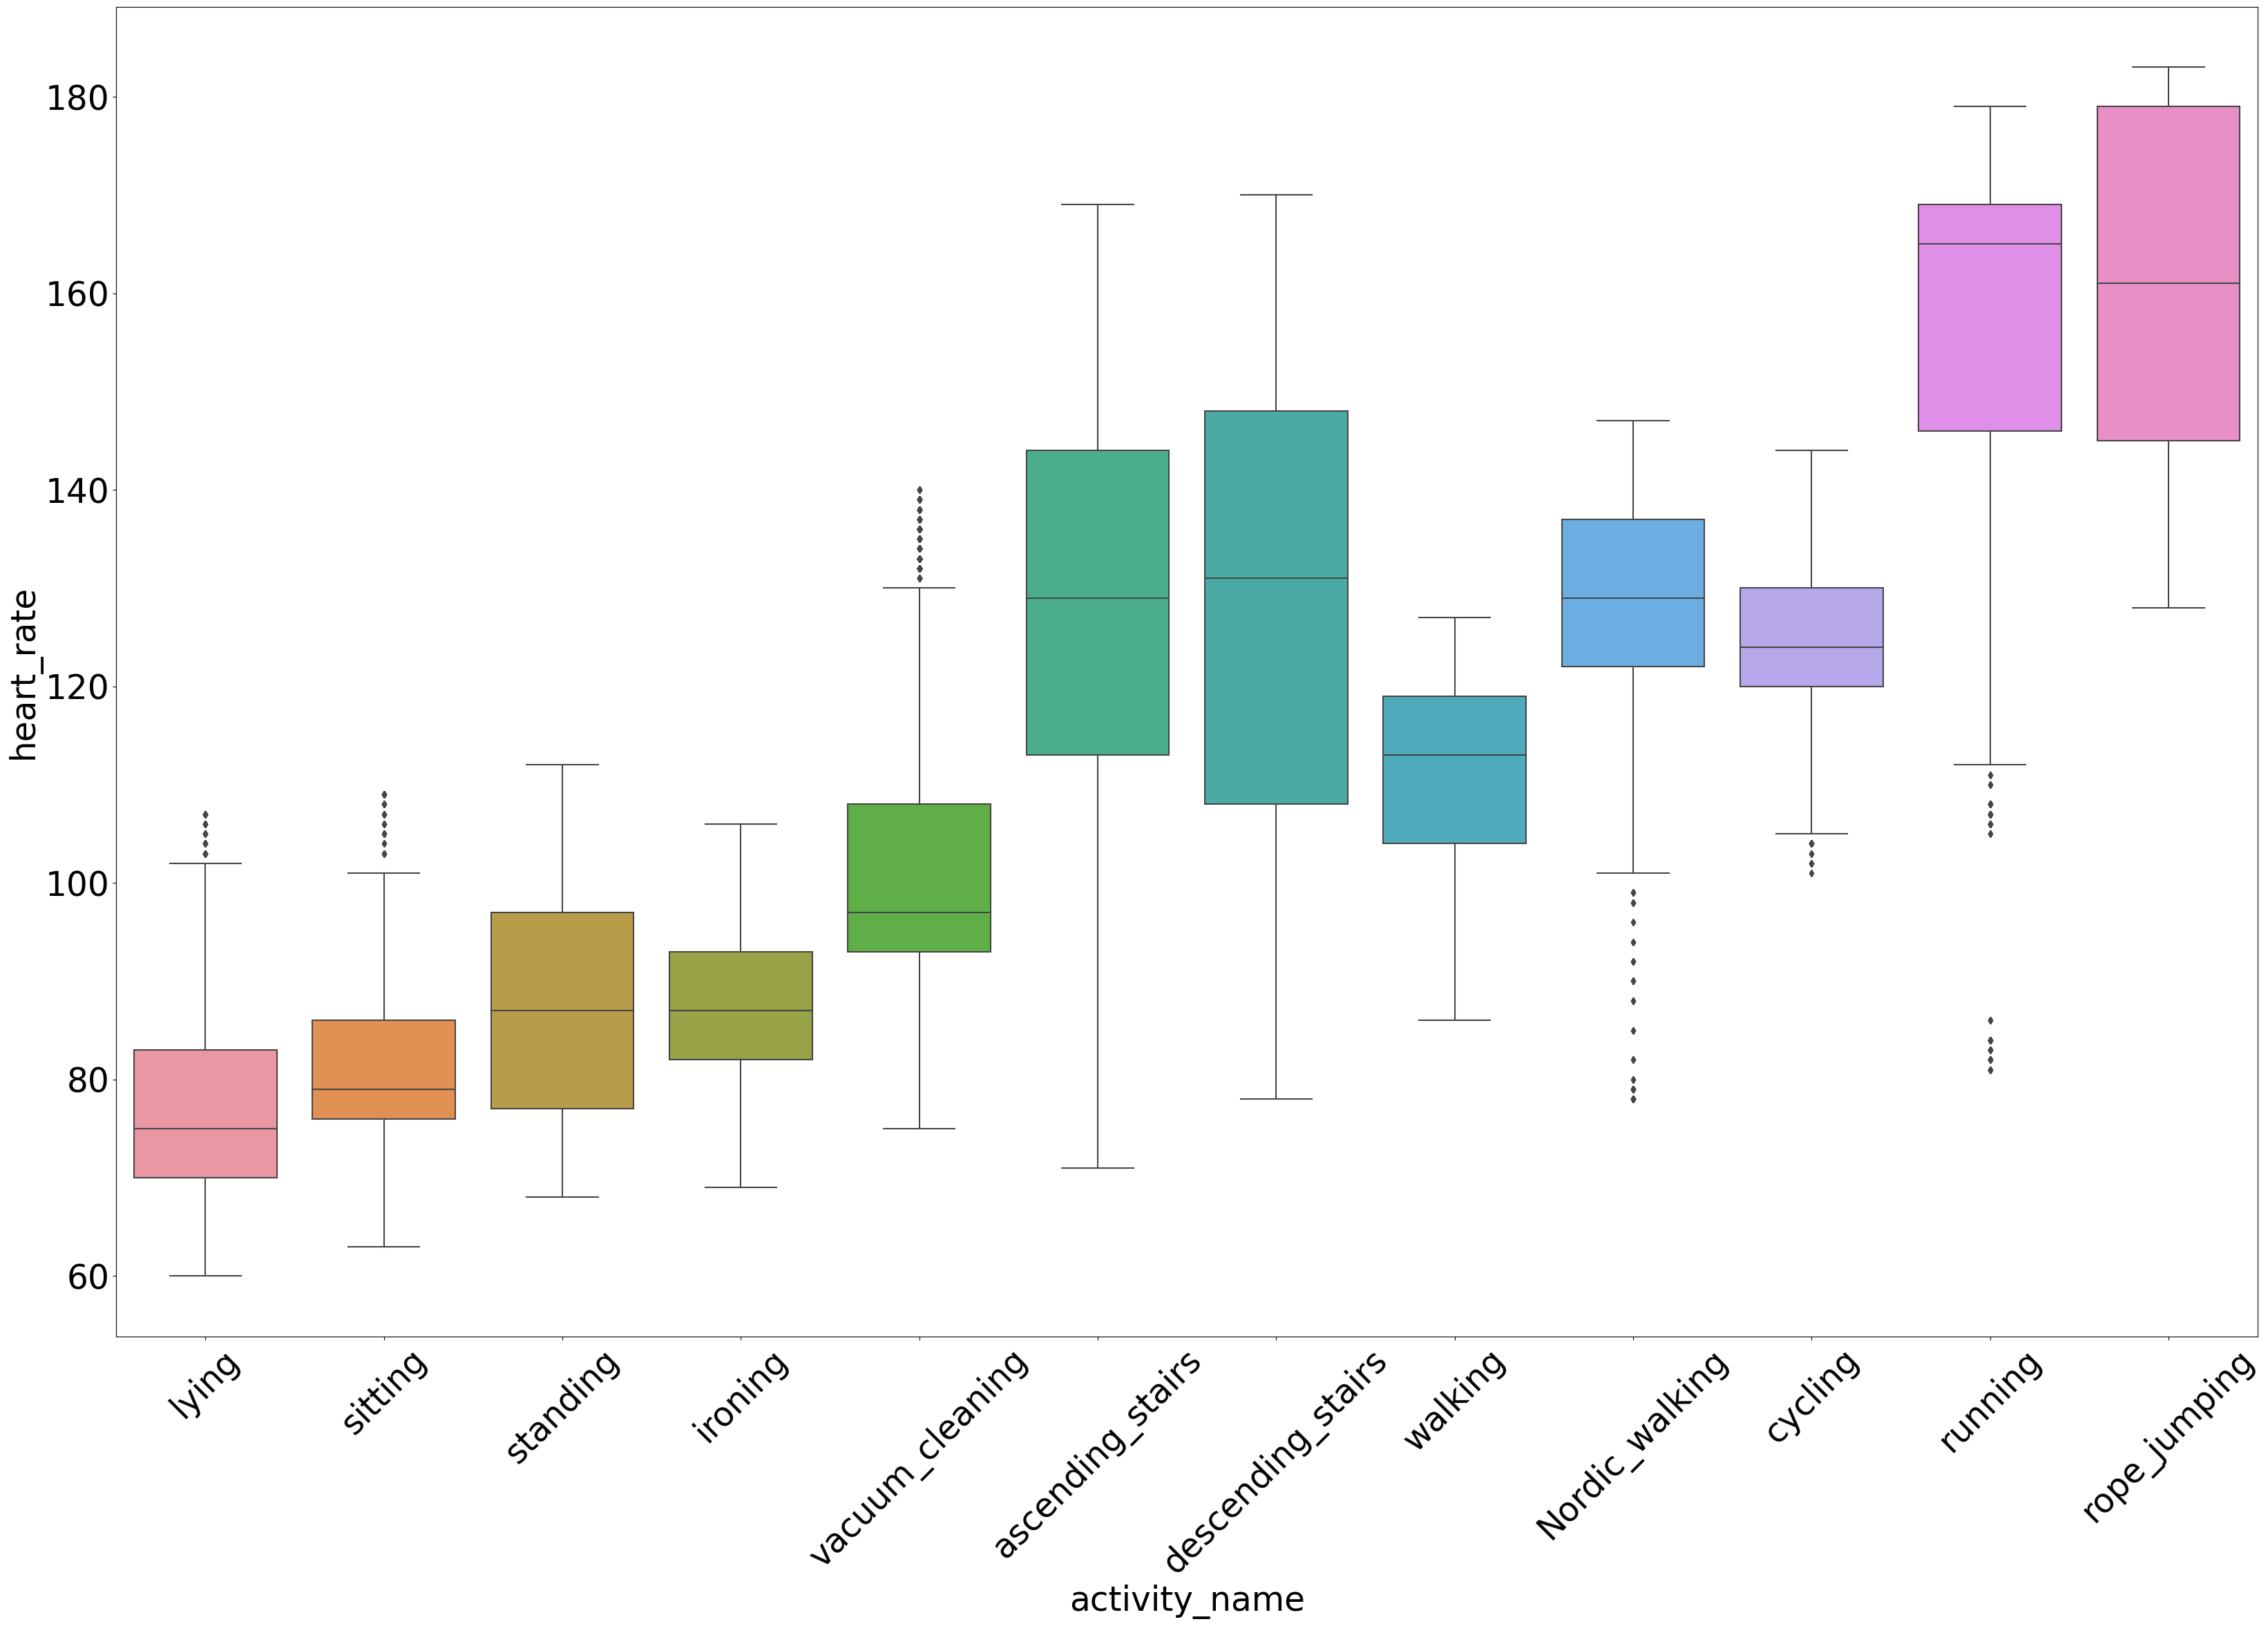

In [85]:
rcParams['figure.figsize'] = 40,25 # Setting the figure dimensions 
rcParams['font.size'] = 35 # Setting the text and number font size
ax=sns.boxplot(x="activity_name",y="heart_rate",data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)# Rotating Text
plt.show()

  1. From the boxplot we can notice that activities like running and rope jumping have higher average heart rate than other activities<br>
  2. 'Nordic_walking' and 'running' have a lot of outliers on the lower side<br>
  3.  Activities like 'lying','sitting' and standing have a lot of outliers on the upper side.

* Boxplot of hand temperature grouped by activity

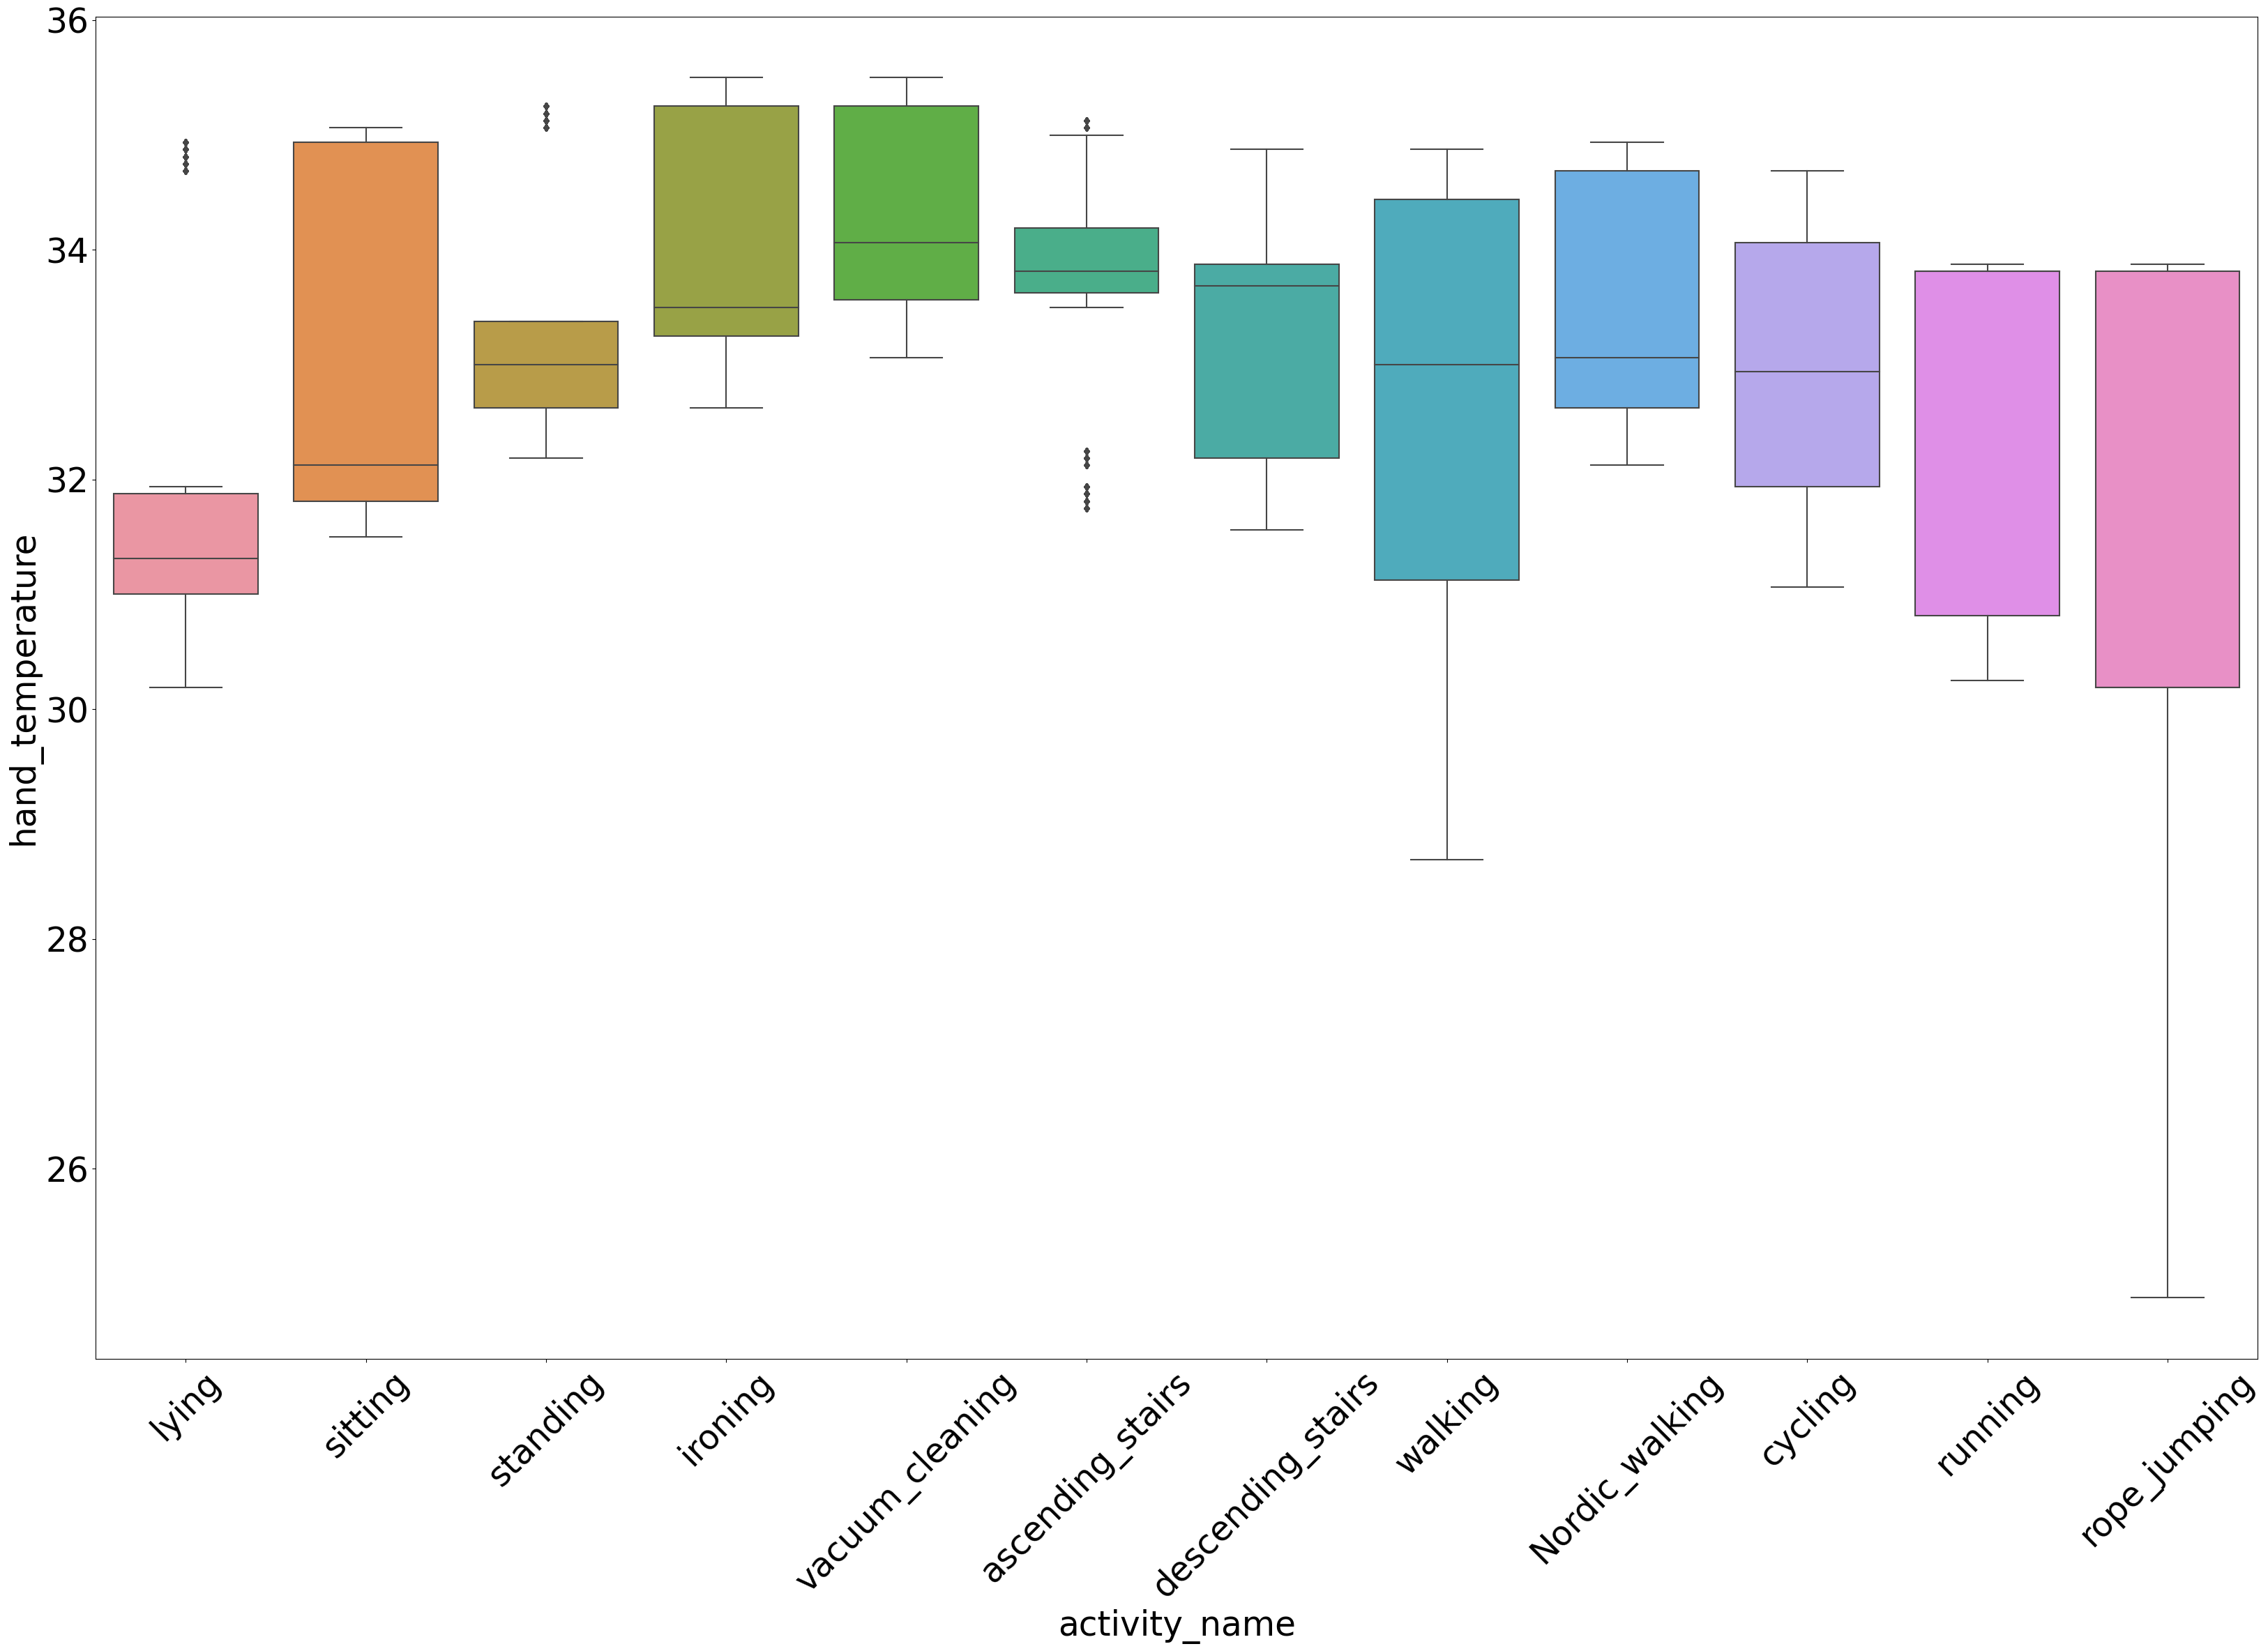

In [86]:
ax=sns.boxplot(x="activity_name",y="hand_temperature",data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)# Rotating Text
plt.show()

1. "Ironing" and "vacuum_cleaning" may have higher average hand temperatures compared to other activitiies<br>
2. "Lying" and "standing" have outliers on the upper side while "ascending_stairs" has it on the lower side

* Boxplot of ankle temperature grouped by activity

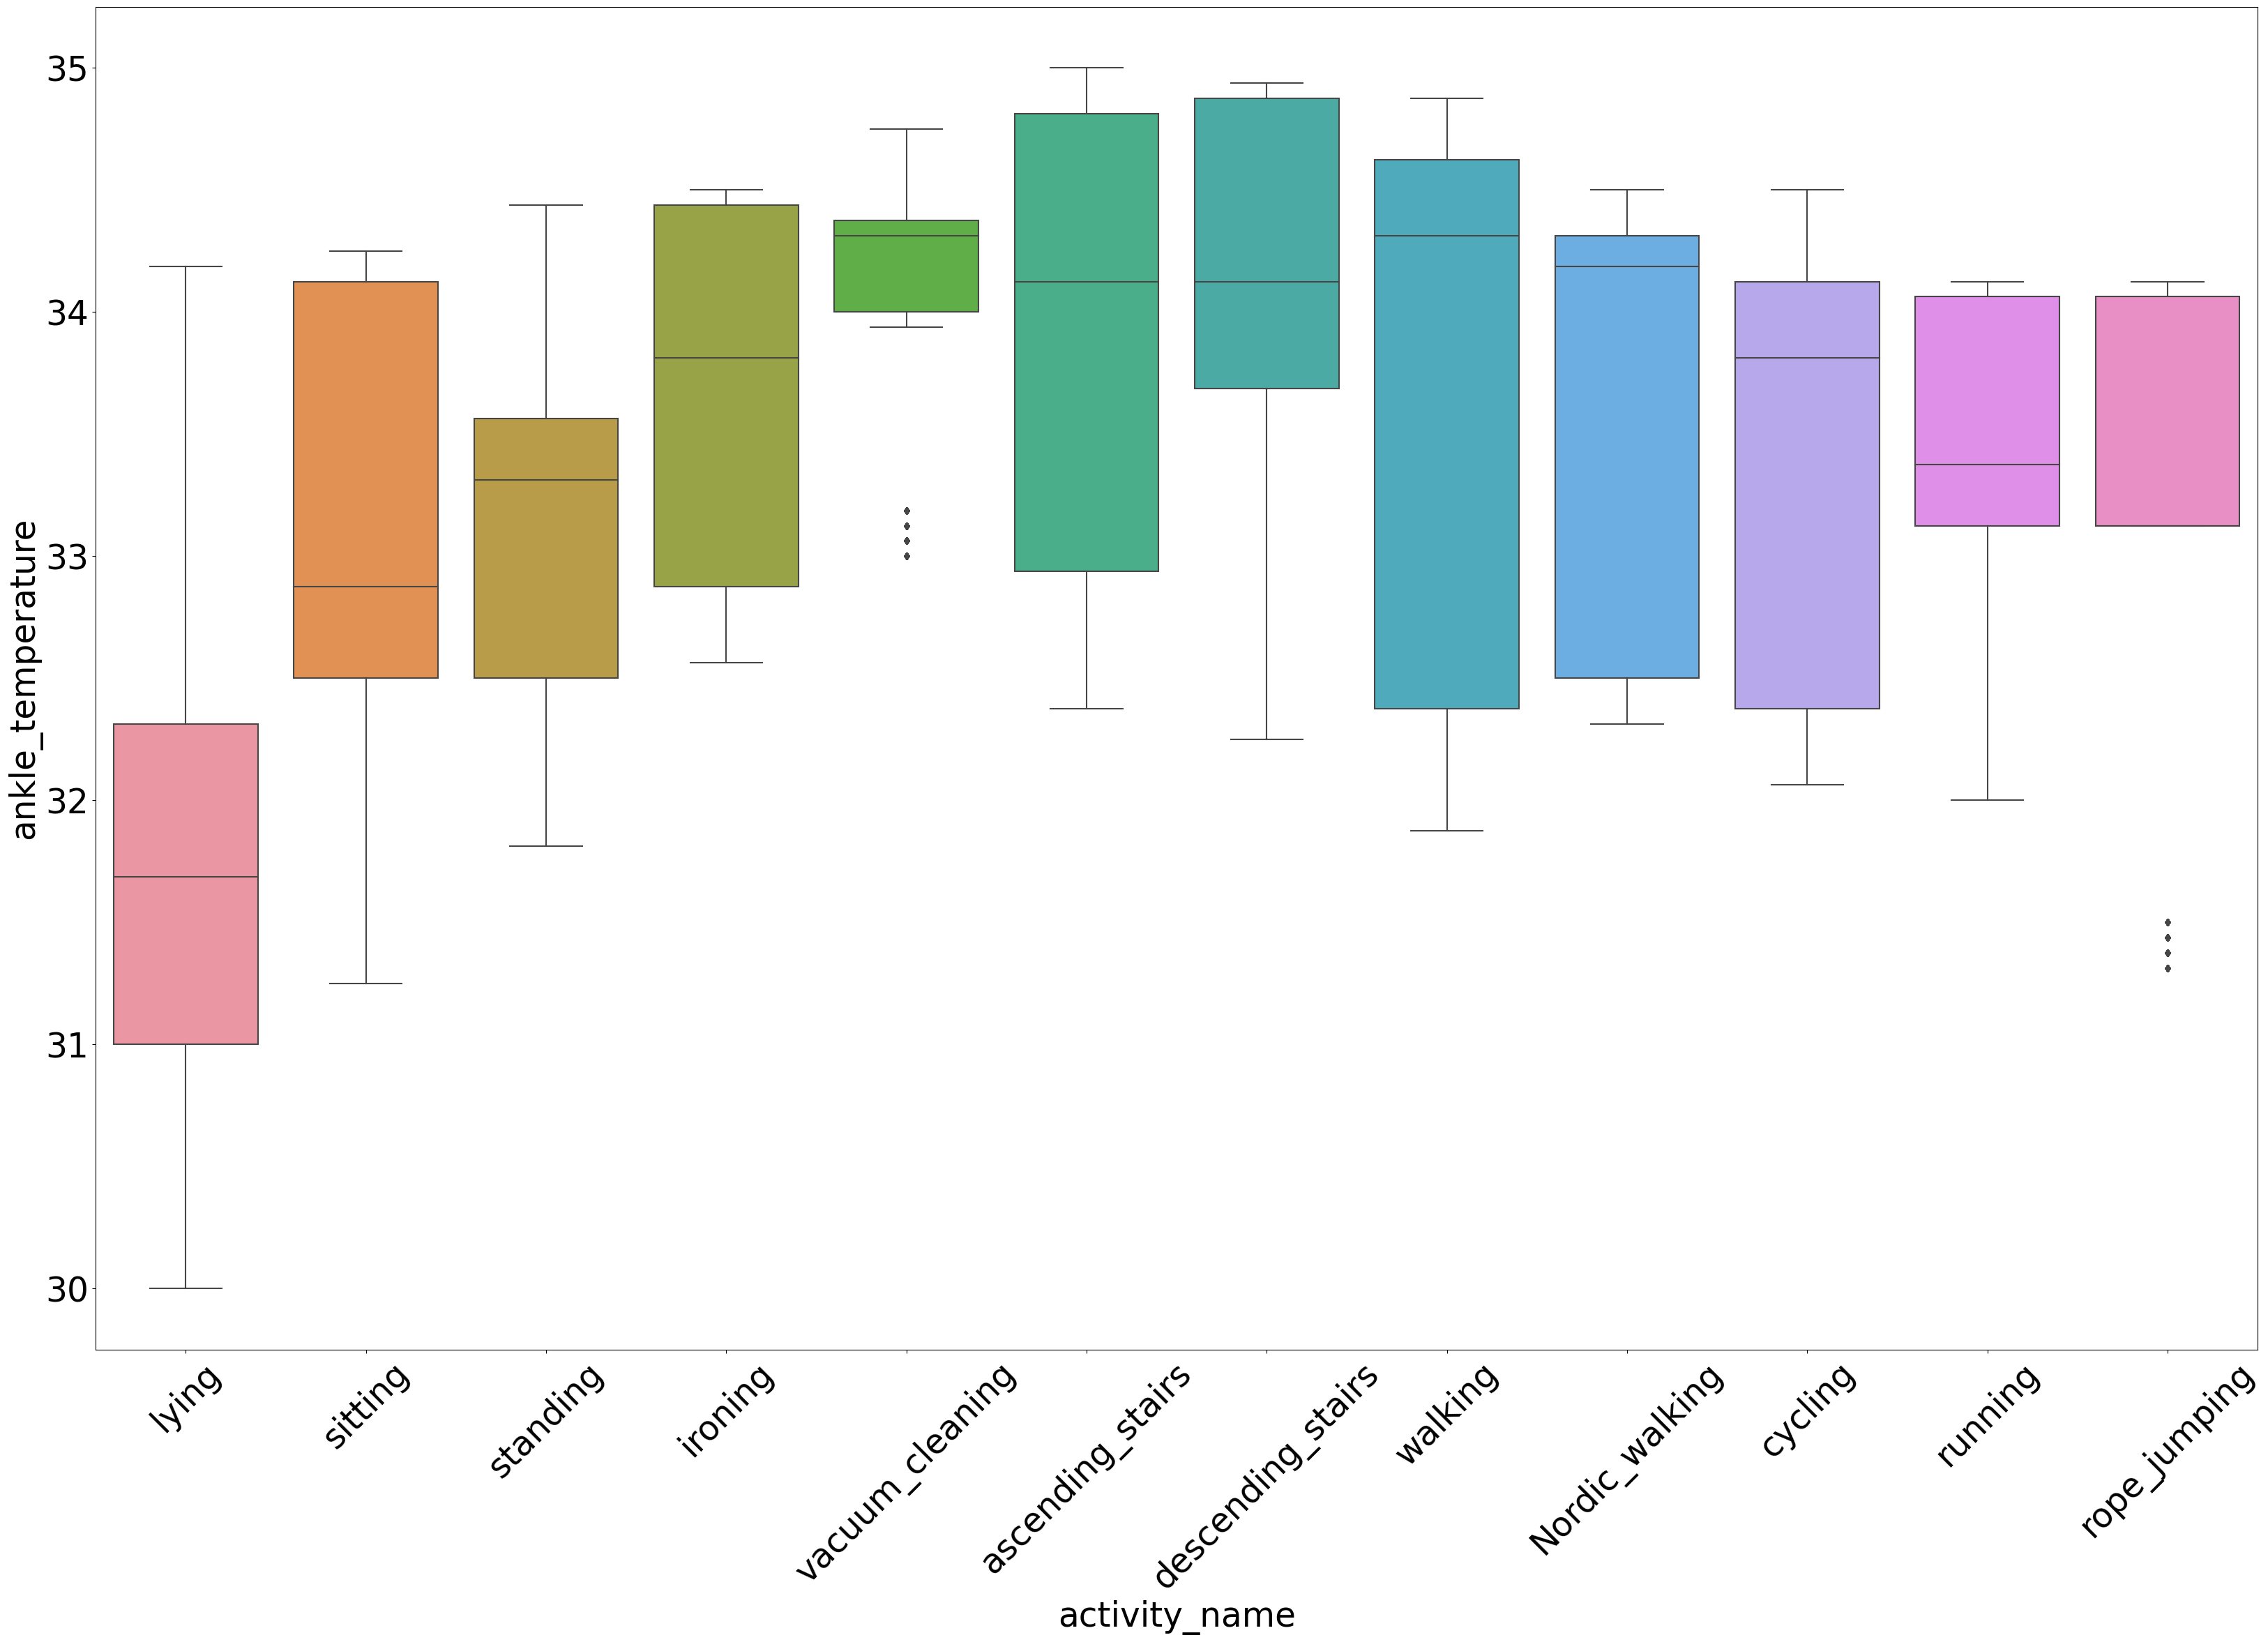

In [87]:
ax=sns.boxplot(x="activity_name",y="ankle_temperature",data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45) # Rotating Text
plt.show()

1. Interestly, we see that ankle_temperature might be lower on average while lying.<br>
2. Outliers are mostly present in "rope_jumping" and "vacuum_cleaning" on the lower side. 

* Boxplot of chest temperature grouped by activity

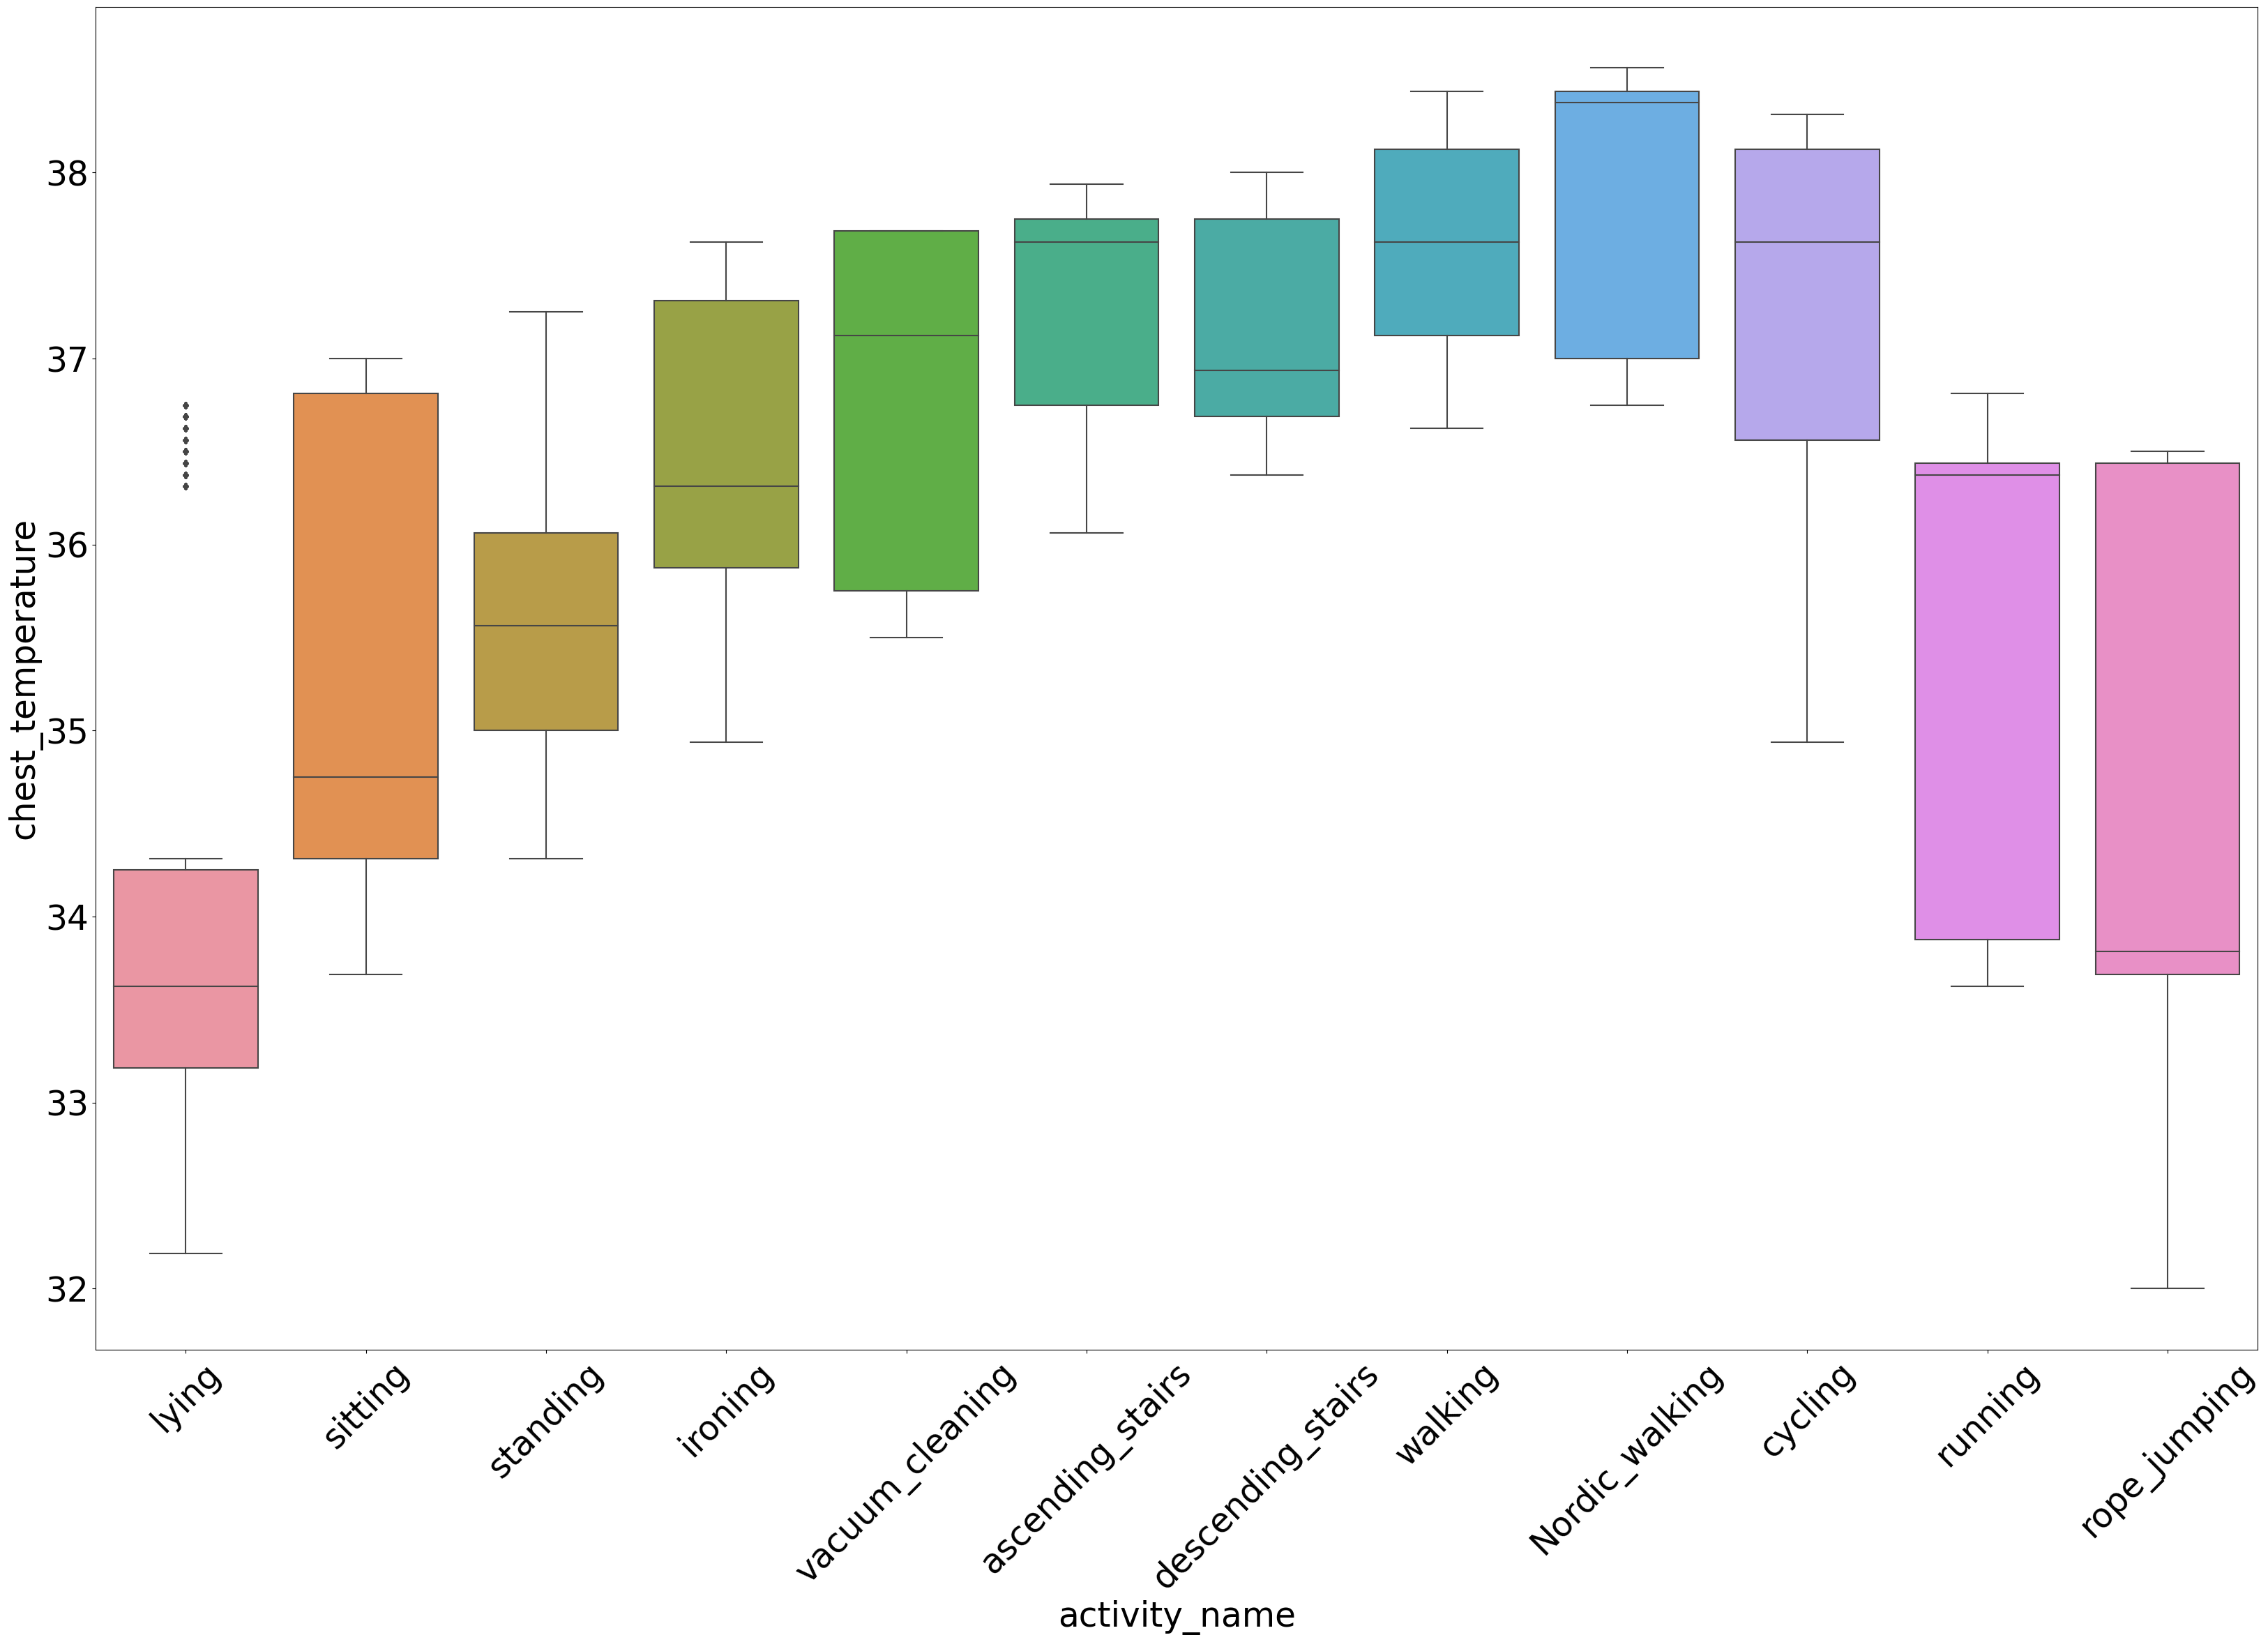

In [88]:
ax=sns.boxplot(x="activity_name",y="chest_temperature",data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45) # Rotating Text
plt.show()

1. Just like ankle temperature,the mean of chest temperature seems to be lower while lying and <br>
   even "running" seems to have lower average although the data is more widely distributed.<br>
2. The outliers are only present in "lying" and they are on the higher side.

* A joint plot trying to investigate possibility of correlation between heart rate <br>
  and chest temperature.

<Figure size 4000x2500 with 0 Axes>

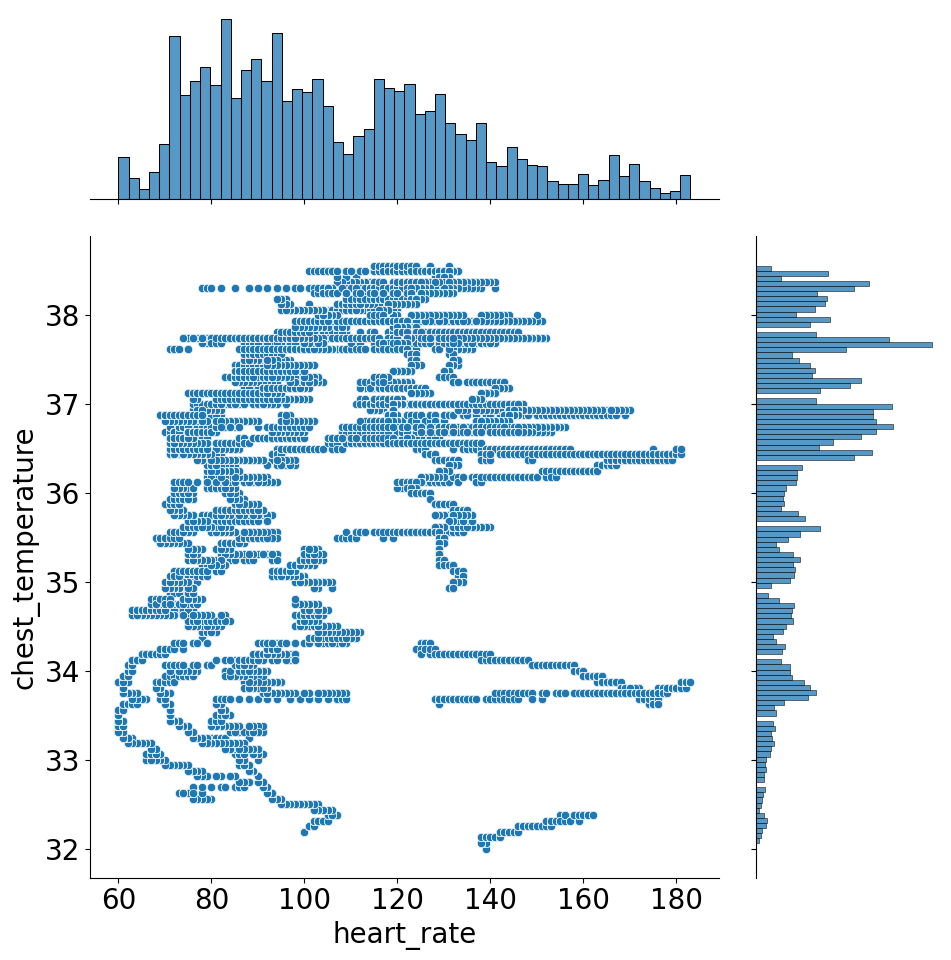

In [89]:
plt.clf()
rcParams['font.size'] = 20 # Setting the text and number font size
g = sns.JointGrid(data=train, x="heart_rate", y="chest_temperature",
                  height=10,ratio=3)
g.plot_joint(sns.scatterplot,palette='colorblind')
g.plot_marginals(sns.histplot)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45) # Rotating Text
plt.show()

1. From the scatter plot, we see that there does not seem to be a correlation between<br>
   the two variables.<br>
2. The respective histograms indicate that both the features considered have <br>
   a multi-modal distribution

### Decriptive Statistics<br>
Mean of heart rate and temperatures for each activity

In [90]:
display(train.groupby(by='activity_name')[['heart_rate','chest_temperature','hand_temperature',
    'ankle_temperature']].mean())
discard = ['activity_id','activity','time_stamp','id']# Columns to exclude from descriptive statistics
# Creating table with only relevant columns
train_trimmed = train[[i for i in train.columns if i not in discard]]

,heart_rate,chest_temperature,hand_temperature,ankle_temperature
activity_name,,,,
Nordic_walking,128.462013,38.002231,33.466998,33.575698
ascending_stairs,128.158345,37.245370,33.749157,33.902096
cycling,124.660034,37.275012,32.946659,33.469546
descending_stairs,128.177738,37.216538,33.459013,33.975654
ironing,87.563446,36.394810,33.870523,33.731976
lying,76.475309,34.159138,32.027296,31.994619
rope_jumping,160.755374,34.170265,30.009695,32.996116
running,155.223016,35.376313,32.384714,33.524444
sitting,80.562120,35.203681,32.868206,32.972880


Descriptive info of relevant feature

In [91]:
display(train_trimmed.describe()) 

,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,...,ankle_3D_acceleration_16_z,ankle_3D_acceleration_6_x,ankle_3D_acceleration_6_y,ankle_3D_acceleration_6_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z
count,47123.000000,511965.000000,511965.000000,511965.000000,511965.000000,511965.000000,511965.000000,511965.000000,511965.000000,511965.000000,...,512343.000000,512343.000000,512343.000000,512343.000000,512343.000000,512343.000000,512343.000000,512343.000000,512343.000000,512343.000000
mean,106.970863,33.087710,-4.533605,5.126806,3.689248,-4.455751,5.144888,3.867786,0.018446,0.029293,...,-2.872810,9.265303,0.020724,-2.487389,0.009565,-0.029752,0.019248,-33.980589,0.408594,17.520469
std,27.444198,1.577238,5.988854,5.734625,3.835899,6.002921,5.606223,3.824962,1.201751,0.869487,...,4.035141,6.228497,7.345212,3.701292,1.086237,0.650960,1.996637,21.388989,23.859013,21.521871
min,60.000000,24.875000,-84.937200,-70.652900,-38.907800,-61.193800,-61.661900,-35.489600,-27.804400,-17.849500,...,-158.830000,-51.532900,-61.903500,-62.289300,-13.385600,-7.807450,-14.019600,-172.865000,-137.908000,-102.716000
25%,85.000000,32.187500,-8.794820,2.547690,1.278630,-8.691700,2.599640,1.489900,-0.353937,-0.210912,...,-4.202005,8.366700,-2.298375,-3.826380,-0.217546,-0.120800,-0.473377,-45.250950,-14.075650,3.738570
50%,102.000000,33.125000,-4.542710,4.524870,3.472200,-4.437940,4.538110,3.717360,-0.003881,0.008010,...,-2.650460,9.529670,-0.229510,-2.275910,0.004332,-0.003775,-0.004166,-34.933600,-0.243615,19.063400
75%,125.000000,34.187500,-0.163143,7.352330,6.452210,-0.033667,7.385470,6.703310,0.327972,0.263073,...,-1.138205,10.194800,1.662060,-0.709163,0.111165,0.132976,0.073888,-16.216450,18.924900,31.979150
max,183.000000,35.500000,47.631400,155.257000,76.639600,32.067800,62.259800,52.710700,26.415800,13.172700,...,151.510000,61.947200,62.033000,60.935700,13.142500,6.410380,14.482700,91.247700,94.247800,121.814000


Correlation table of relevant features

In [92]:
display(train_trimmed.corr()) 

,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,...,ankle_3D_acceleration_16_z,ankle_3D_acceleration_6_x,ankle_3D_acceleration_6_y,ankle_3D_acceleration_6_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z
heart_rate,1.000000,-0.122959,-0.263316,0.143729,-0.206782,-0.266920,0.148178,-0.209679,0.037024,0.045291,...,-0.017523,0.311293,0.293849,-0.009383,0.001007,-0.013049,0.007745,-0.351276,-0.365960,-0.068844
hand_temperature,-0.122959,1.000000,-0.085815,-0.018689,-0.015190,-0.074204,-0.019935,0.000098,-0.029583,0.003429,...,-0.009622,0.093833,0.043770,-0.003549,0.001703,-0.003199,-0.000089,0.007375,0.073591,0.185159
hand_3D_acceleration_16_x,-0.263316,-0.085815,1.000000,-0.057713,0.141728,0.983274,-0.075834,0.134792,0.032221,-0.039698,...,-0.015708,-0.321101,-0.135888,-0.020850,0.054003,-0.021406,0.152355,0.060614,0.270243,-0.058754
hand_3D_acceleration_16_y,0.143729,-0.018689,-0.057713,1.000000,0.040135,-0.053051,0.923348,0.027672,0.162745,-0.036482,...,-0.033486,0.042854,0.125328,-0.036776,0.024641,-0.046539,-0.029790,-0.056197,-0.040089,-0.002642
hand_3D_acceleration_16_z,-0.206782,-0.015190,0.141728,0.040135,1.000000,0.149033,0.002904,0.966802,-0.009302,0.021929,...,0.003981,-0.142191,-0.074020,0.003795,0.047002,0.024120,0.039365,0.055797,0.116743,-0.025628
hand_3D_acceleration_6_x,-0.266920,-0.074204,0.983274,-0.053051,0.149033,1.000000,-0.073144,0.140410,0.025595,-0.019041,...,-0.012814,-0.315738,-0.133756,-0.017696,0.055074,-0.030187,0.132139,0.060253,0.276468,-0.055120
hand_3D_acceleration_6_y,0.148178,-0.019935,-0.075834,0.923348,0.002904,-0.073144,1.000000,0.025862,0.114662,-0.042269,...,-0.036072,0.035771,0.133571,-0.039307,0.024903,-0.040741,-0.008164,-0.058800,-0.041966,-0.001969
hand_3D_acceleration_6_z,-0.209679,0.000098,0.134792,0.027672,0.966802,0.140410,0.025862,1.000000,-0.002552,-0.003456,...,0.002709,-0.143479,-0.072970,0.002374,0.047047,0.027103,0.045692,0.055138,0.120551,-0.024440
hand_3D_gyroscope_x,0.037024,-0.029583,0.032221,0.162745,-0.009302,0.025595,0.114662,-0.002552,1.000000,-0.311805,...,-0.021430,0.028614,-0.000934,-0.025644,-0.009661,-0.049266,0.106972,0.017712,-0.055932,-0.008197
hand_3D_gyroscope_y,0.045291,0.003429,-0.039698,-0.036482,0.021929,-0.019041,-0.042269,-0.003456,-0.311805,1.000000,...,-0.003014,0.031343,0.023879,-0.002575,0.070916,0.040303,-0.032875,-0.027517,-0.019653,-0.009245
